In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_ry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          8.2644 ( 8.0831,  8.3315) ( 8.1270,  8.3387)  0.2117 (Jnode 106)\n',
 't_n56          8.2171 ( 8.0167,  8.3194) ( 8.0602,  8.3316)  0.2714 (Jnode 105)\n',
 't_n57          7.8135 ( 7.6060,  7.9569) ( 7.6293,  7.9699)  0.3406 (Jnode 104)\n',
 't_n58          6.7782 ( 6.5659,  6.9578) ( 6.5699,  6.9600)  0.3902 (Jnode 103)\n',
 't_n59          6.6011 ( 6.3881,  6.7842) ( 6.3990,  6.7916)  0.3927 (Jnode 102)\n',
 't_n60          6.3503 ( 6.1386,  6.5367) ( 6.1463,  6.5435)  0.3973 (Jnode 101)\n',
 't_n61          5.9878 ( 5.7785,  6.1791) ( 5.7915,  6.1907)  0.3992 (Jnode 100)\n',
 't_n62          2.7996 ( 2.4347,  3.1641) ( 2.4367,  3.1652)  0.7285 (Jnode 99)\n',
 't_n63          4.6186 ( 4.4261,  4.8109) ( 4.4259,  4.8104)  0.3845 (Jnode 98)\n',
 't_n64          3.6757 ( 3.5125,  3.8478) ( 3.5167,  3.8514)  0.3347 (Jnode 97)\n',
 't_n65          3.3819 ( 3.2307,  3.5412) ( 3.2341,  3.5444)  0.3102 (Jnode 96)\n',
 't_n66          2.8567 ( 2.7290,  2.9938) ( 2.7240,  2.98

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[8.2644,
 8.2171,
 7.8135,
 6.7782,
 6.6011,
 6.3503,
 5.9878,
 2.7996,
 4.6186,
 3.6757,
 3.3819,
 2.8567,
 2.2056,
 1.6617,
 0.6786,
 3.6193,
 6.4518,
 6.2314,
 5.9043,
 4.3028,
 3.8812,
 3.3496,
 6.2653,
 5.9959,
 5.7739,
 5.4301,
 4.9747,
 4.8313,
 4.2507,
 3.9002,
 3.5994,
 2.7342,
 2.5307,
 4.2863,
 3.5123,
 6.1467,
 1.5293,
 5.9841,
 5.6404,
 5.0877,
 4.7662,
 3.5711,
 4.0649,
 4.8676,
 4.6765,
 4.3646,
 3.2843,
 4.23,
 7.1193,
 5.3606,
 3.3971,
 2.5289,
 5.469]

In [21]:
lower_ci_iqtree

[8.0831,
 8.0167,
 7.606,
 6.5659,
 6.3881,
 6.1386,
 5.7785,
 2.4347,
 4.4261,
 3.5125,
 3.2307,
 2.729,
 2.1222,
 1.649,
 0.5939,
 3.3829,
 6.2333,
 5.9752,
 5.6817,
 3.9933,
 3.5554,
 2.9289,
 6.0493,
 5.7731,
 5.5475,
 5.1993,
 4.7477,
 4.5987,
 4.0159,
 3.6702,
 3.3712,
 2.52,
 2.3182,
 4.0395,
 3.2543,
 5.9262,
 1.0955,
 5.7619,
 5.4198,
 4.8615,
 4.5379,
 3.3011,
 3.8204,
 4.6364,
 4.446,
 4.1078,
 2.9981,
 3.9072,
 6.8855,
 4.9868,
 2.9738,
 2.0792,
 4.9427]

In [22]:
upper_ci_iqtree

[8.3315,
 8.3194,
 7.9569,
 6.9578,
 6.7842,
 6.5367,
 6.1791,
 3.1641,
 4.8109,
 3.8478,
 3.5412,
 2.9938,
 2.2984,
 1.696,
 0.766,
 3.8516,
 6.642,
 6.4625,
 6.11,
 4.6022,
 4.1955,
 3.7475,
 6.4561,
 6.1955,
 5.9791,
 5.642,
 5.1896,
 5.0549,
 4.4779,
 4.1262,
 3.824,
 2.9514,
 2.747,
 4.5252,
 3.7676,
 6.3426,
 1.8569,
 6.1827,
 5.8386,
 5.2988,
 4.9797,
 3.8335,
 4.3028,
 5.084,
 4.8978,
 4.6084,
 3.5686,
 4.537,
 7.3134,
 5.7052,
 3.8277,
 2.9912,
 5.9464]

In [23]:
file_LG = open("LG_ry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

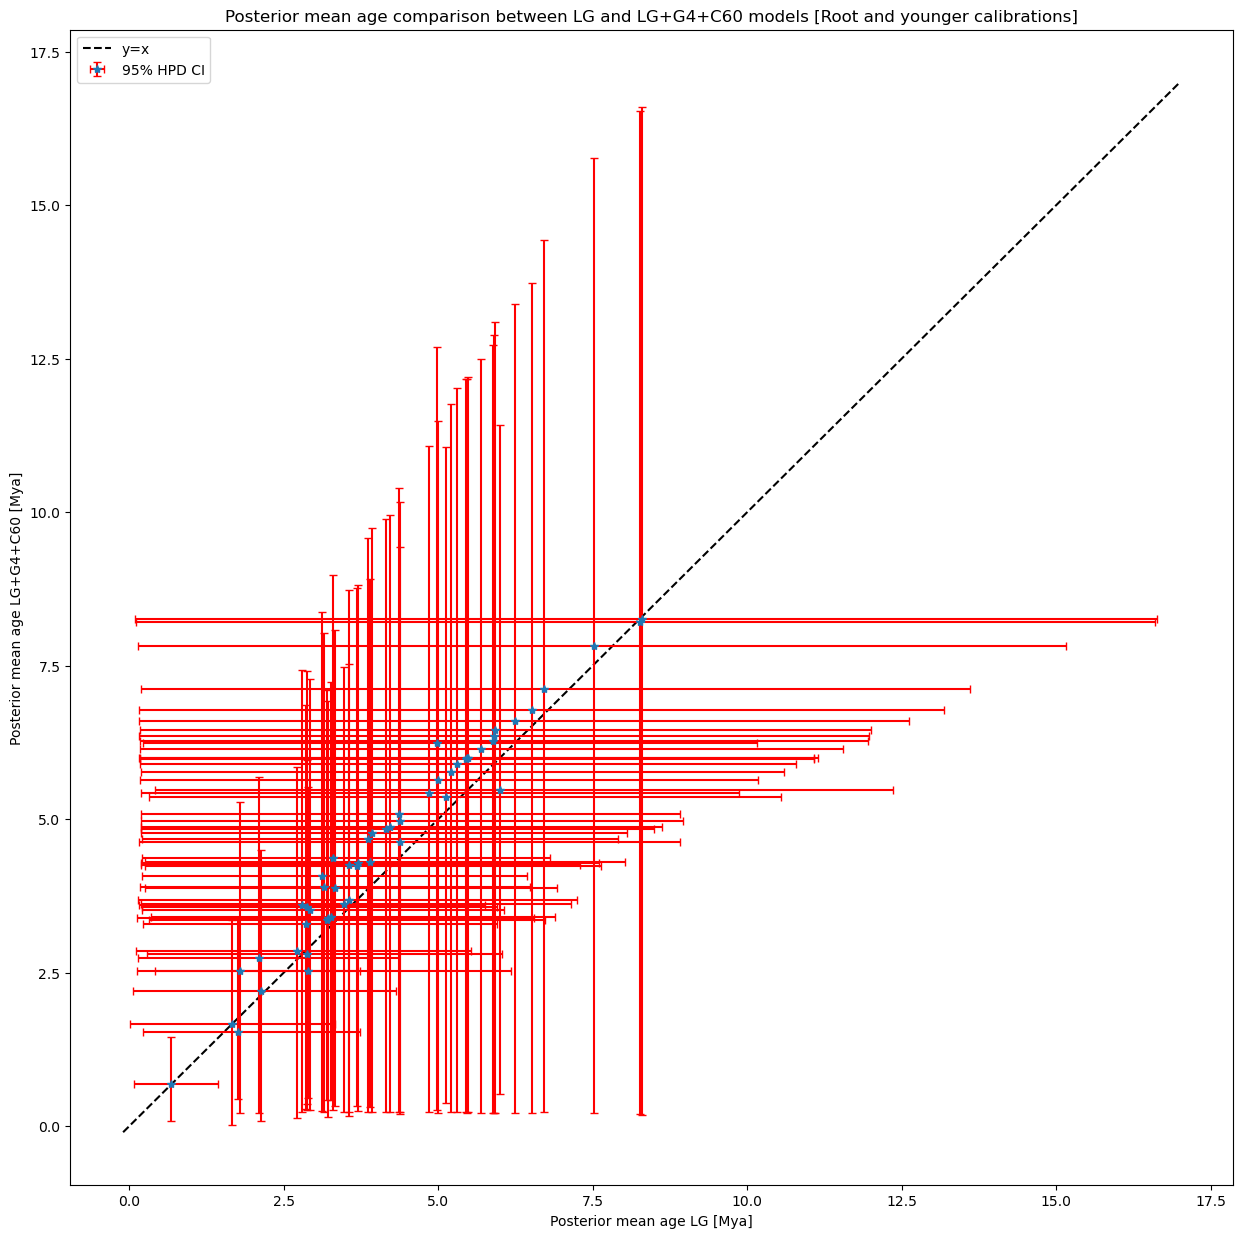

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Root and younger calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_ry.png')

In [25]:
posterior_mean_baseml

[8.2968,
 8.2701,
 7.5241,
 6.5162,
 6.2349,
 5.9091,
 5.4611,
 2.8722,
 4.3817,
 3.5549,
 3.2102,
 2.7078,
 2.1237,
 1.6556,
 0.6802,
 3.4785,
 5.9166,
 4.9765,
 5.3061,
 3.8897,
 3.3338,
 3.2023,
 5.8918,
 5.4807,
 5.2043,
 4.842,
 4.3838,
 4.1529,
 3.5526,
 3.1517,
 2.7918,
 2.1026,
 1.7954,
 3.7022,
 2.926,
 5.6894,
 1.7518,
 5.4508,
 4.999,
 4.3611,
 3.9325,
 2.8678,
 3.1145,
 4.2121,
 3.8545,
 3.3036,
 2.8633,
 3.6859,
 6.713,
 5.1274,
 3.2603,
 2.8837,
 5.9951]

In [26]:
posterior_mean_iqtree

[8.2644,
 8.2171,
 7.8135,
 6.7782,
 6.6011,
 6.3503,
 5.9878,
 2.7996,
 4.6186,
 3.6757,
 3.3819,
 2.8567,
 2.2056,
 1.6617,
 0.6786,
 3.6193,
 6.4518,
 6.2314,
 5.9043,
 4.3028,
 3.8812,
 3.3496,
 6.2653,
 5.9959,
 5.7739,
 5.4301,
 4.9747,
 4.8313,
 4.2507,
 3.9002,
 3.5994,
 2.7342,
 2.5307,
 4.2863,
 3.5123,
 6.1467,
 1.5293,
 5.9841,
 5.6404,
 5.0877,
 4.7662,
 3.5711,
 4.0649,
 4.8676,
 4.6765,
 4.3646,
 3.2843,
 4.23,
 7.1193,
 5.3606,
 3.3971,
 2.5289,
 5.469]

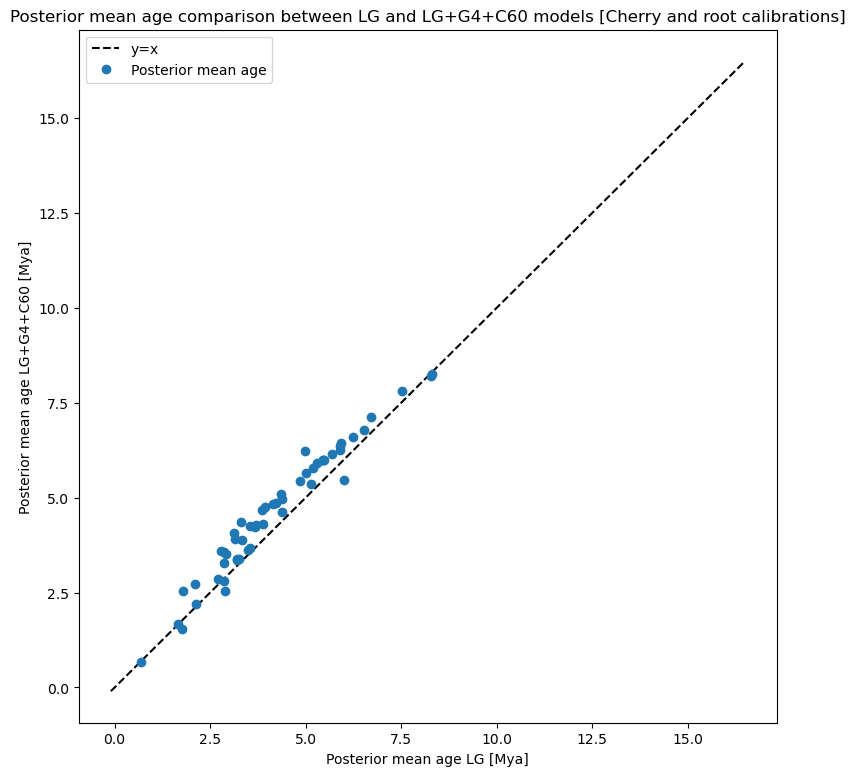

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_ry_scatter.png')

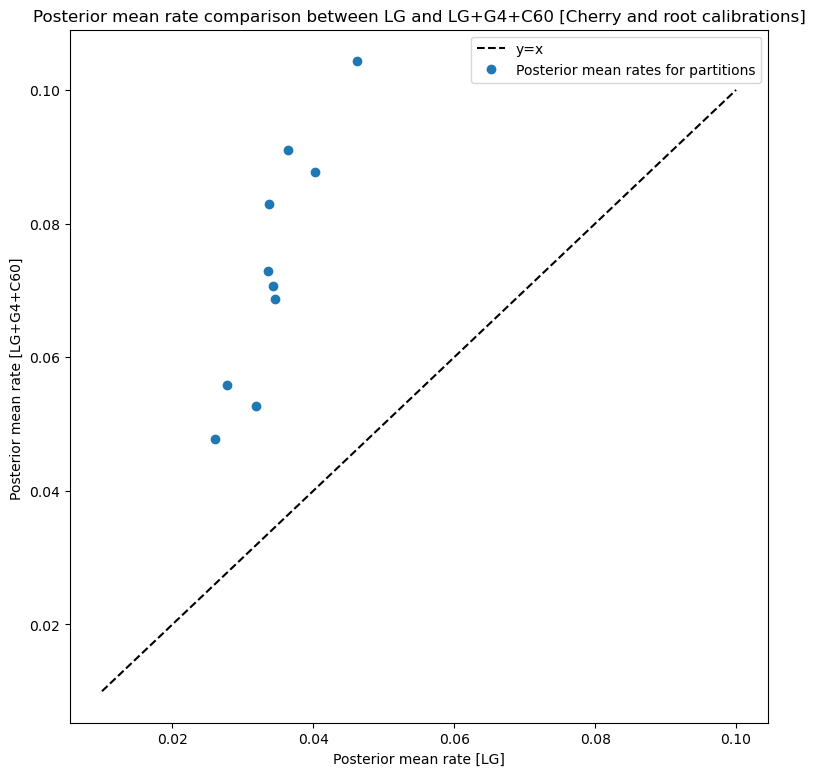

In [28]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.1], 
        [0.01, 0.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C60] ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C60_cr_scatter.png')